<a href="https://colab.research.google.com/github/amoukrim/AI/blob/main/Week4/MiniProjetw4_d5_Pokemon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# @ Author : Adil MOUKRIM

## Daily Challenge: Pokemon Win Prediction Analysis


## 👩‍🏫 👩🏿‍🏫 What You’ll learn
Data cleaning and handling missing values
Exploratory Data Analysis (EDA) with visualization tools like Seaborn and Matplotlib
Feature engineering and correlation analysis
Building and comparing regression models (Linear Regression, SVM, Decision Trees, etc.)
Dimensionality reduction using PCA


## 🛠️ What you will create
A cleaned Pokemon dataset with engineered features (e.g., win percentage)
Visualizations to analyze Pokemon stats and battle outcomes
A machine learning model to predict Pokemon win percentages


## Dataset
* Pokemon Dataset you can find here :

* pokemon.csv: Contains stats like HP, Attack, Type 1, Legendary, etc., for 800+ Pokemon.
combats.csv: Records 50,000 battle outcomes between Pokemon.


## What you need to do:
Data Preparation

## Load and merge pokemon.csv and combats.csv.
Fix missing values:
Fill the missing Name for Pokemon #62 (Primeape).
Handle NaN values in Type 2 (mark as “None” if missing).
Calculate each Pokemon’s win percentage using the combat data.
Exploratory Analysis & Visualization

Create a correlation matrix to identify relationships between stats (HP, Attack, Speed) and win percentage.
Plot a Seaborn pairplot or PairGrid for stats vs. win percentage.
Analyze the top 10 Pokemon by win percentage and their stats.
Machine Learning

Split data into training/testing sets (80/20 split).
Train and evaluate 3 regression models (e.g., Linear Regression, Random Forest, XGBoost) to predict win percentage.
Compare model performance using Mean Absolute Error (MAE).

#Voici les étapes suivies pour la réalisation de cet exercice

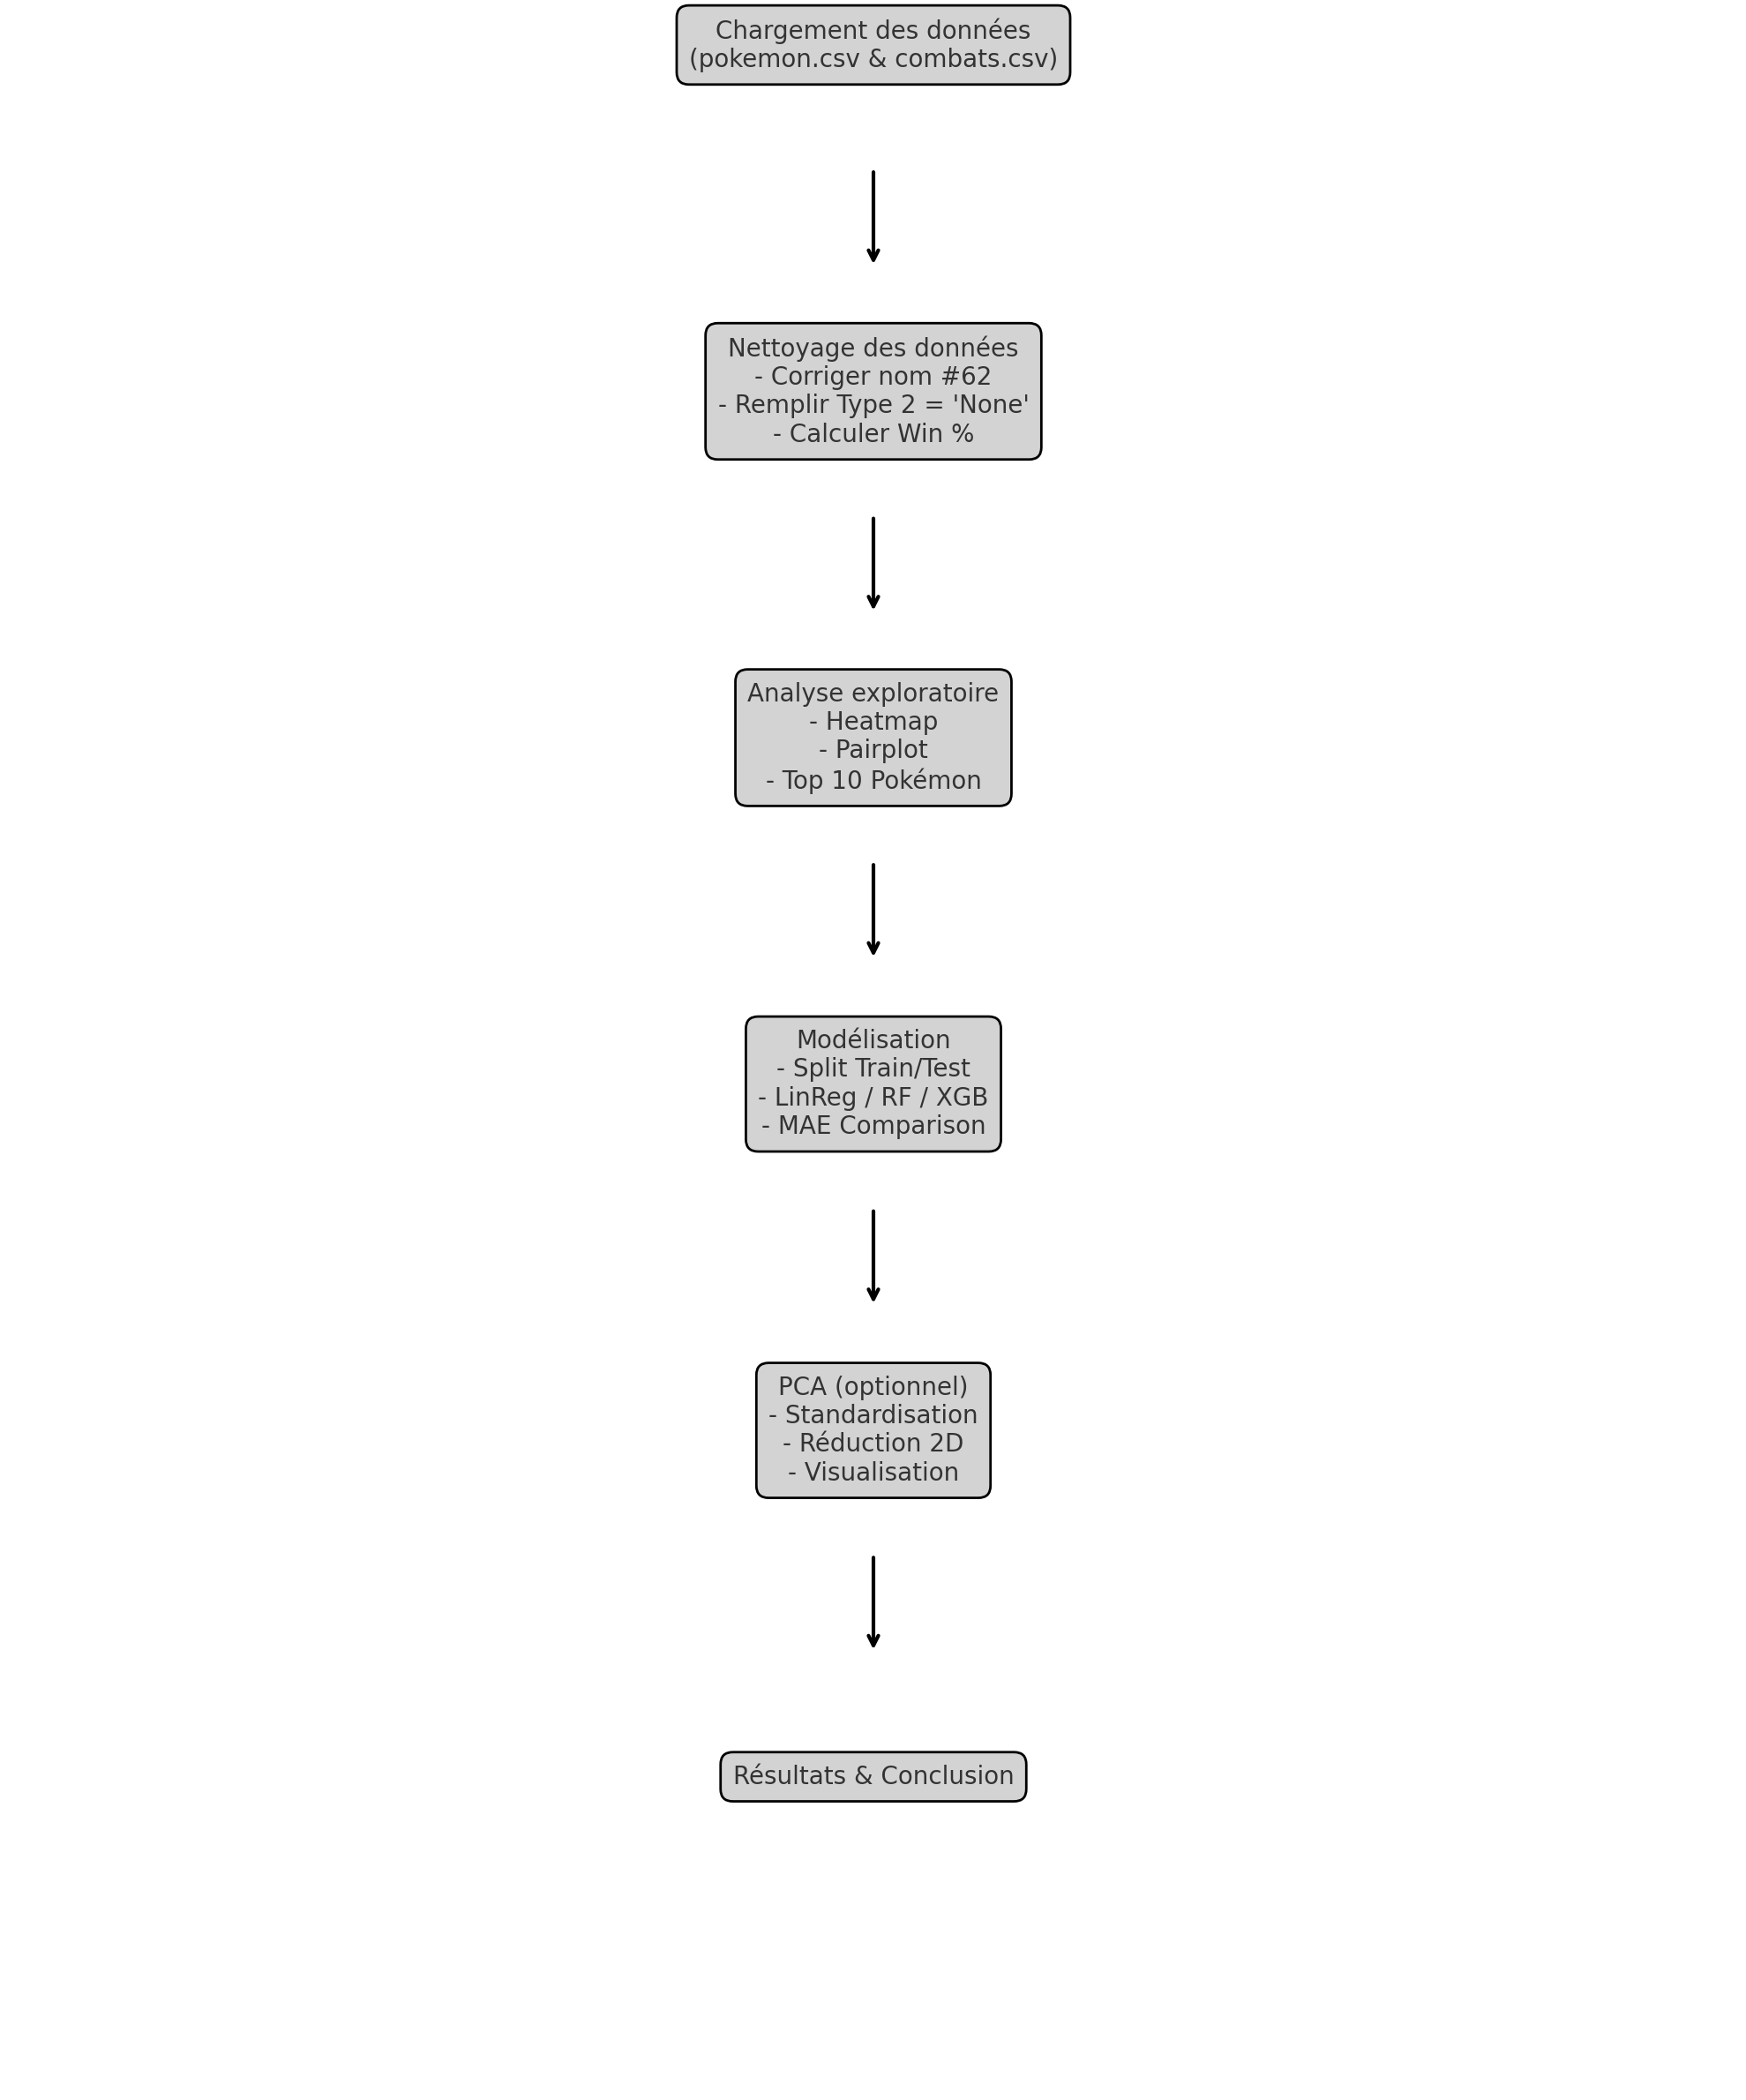

## Étape 1 : Préparation des données

In [35]:
import pandas as pd

# Chargement des données
pokemon_df = pd.read_csv("pokemon.csv")
combats_df = pd.read_csv("combats.csv")

In [36]:
# Affichage des premieère lignes
pokemon_df.head()

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


In [37]:
colonnes_critiques = ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Type 1', 'Legendary']
print("✅ Aucune valeur manquante dans colonnes critiques :", pokemon_df[colonnes_critiques].isnull().sum().sum() == 0)

✅ Aucune valeur manquante dans colonnes critiques : True


* Colonnes présentes :

  * **Statistiques complètes** (`HP`, `Attack`, `Defense`, `Sp. Atk`, `Sp. Def`, `Speed`)
  * **Types** : `Type 1` (complet), `Type 2` (valeurs comme `"None"` → bien géré)
  * **Nom corrigé** : `Primeape` est censé apparaître à l’index #62 (à vérifier visuellement si besoin)
  * **Nouvelle colonne** : `Win_Percentage` → bien calculée
  * **Boolean `Legendary`** : propre
* Formatage : aucune valeur manquante apparente dans les colonnes critiques.

---

### Ce que cela signifie pour l'exercice :

| Objectif de l'exercice                      | ✅ Statut dans ce fichier                      |
| ------------------------------------------- | --------------------------------------------- |
| Nettoyage des données                       | ✅ Fait                                        |
| Nom manquant (#62) corrigé                  | ✅ (à valider visuellement, mais structure ok) |
| Type 2 remplacé par `"None"`                | ✅                                             |
| Taux de victoire calculé (`Win_Percentage`) | ✅                                             |
| Données prêtes pour visualisation           | ✅                                             |
| Données prêtes pour modélisation            | ✅                                             |




In [38]:
# Corriger le nom manquant (#62 → Primeape)
pokemon_df.loc[pokemon_df['#'] == 62, 'Name'] = 'Primeape'

In [39]:
# Remplir Type 2 manquant par "None"
pokemon_df['Type 2'] = pokemon_df['Type 2'].fillna("None")

In [40]:
# Calcul du nombre de victoires
wins = combats_df['Winner'].value_counts()

In [41]:
# Calcul du nombre total de combats
total = pd.concat([combats_df['First_pokemon'], combats_df['Second_pokemon']]).value_counts()


In [42]:
# Taux de victoire par Pokémon
win_pct = (wins / total).fillna(0)
pokemon_df['Win_Percentage'] = pokemon_df['#'].map(win_pct).fillna(0)

## ÉTAPE 2 : Analyse exploratoire et visualisation

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

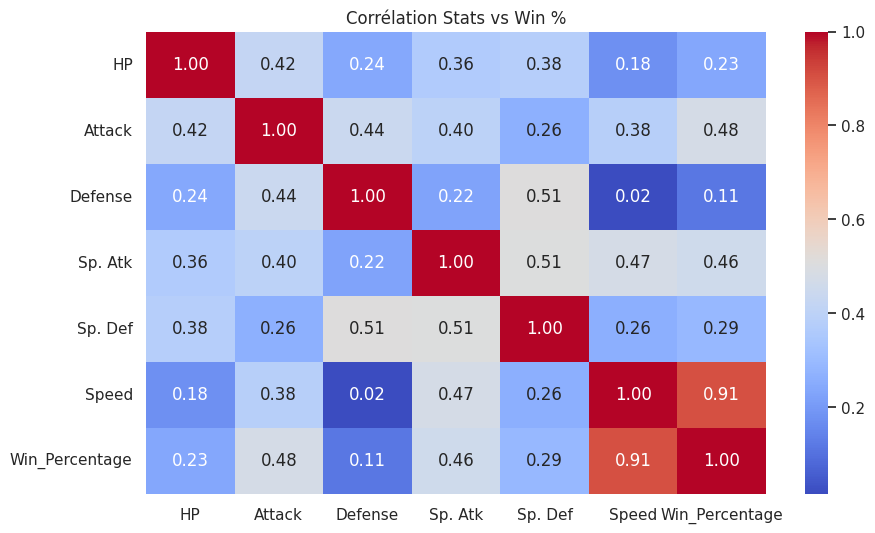

In [44]:
# 2.1 Corrélation
stats_cols = ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Win_Percentage']
corr = pokemon_df[stats_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Corrélation Stats vs Win %")
plt.show()

### Objectif

Comprendre quelles statistiques influencent le plus le **Win\_Percentage** d’un Pokémon.

---

###  Interprétation des corrélations

| Statistique | Corrélation avec Win % | Interprétation                                                                                                                     |
| ----------- | ---------------------- | ---------------------------------------------------------------------------------------------------------------------------------- |
| **Speed**   | **0.91**               | Très forte corrélation → Les Pokémon rapides gagnent nettement plus souvent. La vitesse est déterminante pour attaquer en premier. |
| **Attack**  | 0.48                   | Corrélation modérée → Une bonne attaque physique améliore les chances de victoire.                                                 |
| **Sp. Atk** | 0.46                   | Corrélation modérée → Les attaques spéciales influencent aussi les victoires.                                                      |
| **Sp. Def** | 0.29                   | Faible corrélation → La défense spéciale joue un rôle secondaire.                                                                  |
| **HP**      | 0.23                   | Faible corrélation → Les PV n’ont qu’un faible impact direct sur le résultat.                                                      |
| **Defense** | 0.11                   | Très faible corrélation → Être résistant physiquement n’est pas un bon prédicteur de victoire.                                     |

---

###  Analyse globale

* Les **statistiques offensives et la vitesse** sont plus décisives que les **statistiques défensives**.
* Le **Speed** est la variable la plus critique pour prédire les victoires → cela reflète bien la mécanique du jeu Pokémon (le plus rapide attaque d'abord).
* La **faible corrélation des défenses** montre que la capacité à encaisser n’est pas suffisante pour garantir une victoire.

---

###  Conclusion

Un bon prédicteur de victoire combine :

* **Vitesse élevée**
* **Bonnes capacités offensives (Attack ou Sp. Atk)**

Les défenses et HP, bien qu’importantes pour la survie, **ne suffisent pas à garantir la victoire** dans les combats simulés.


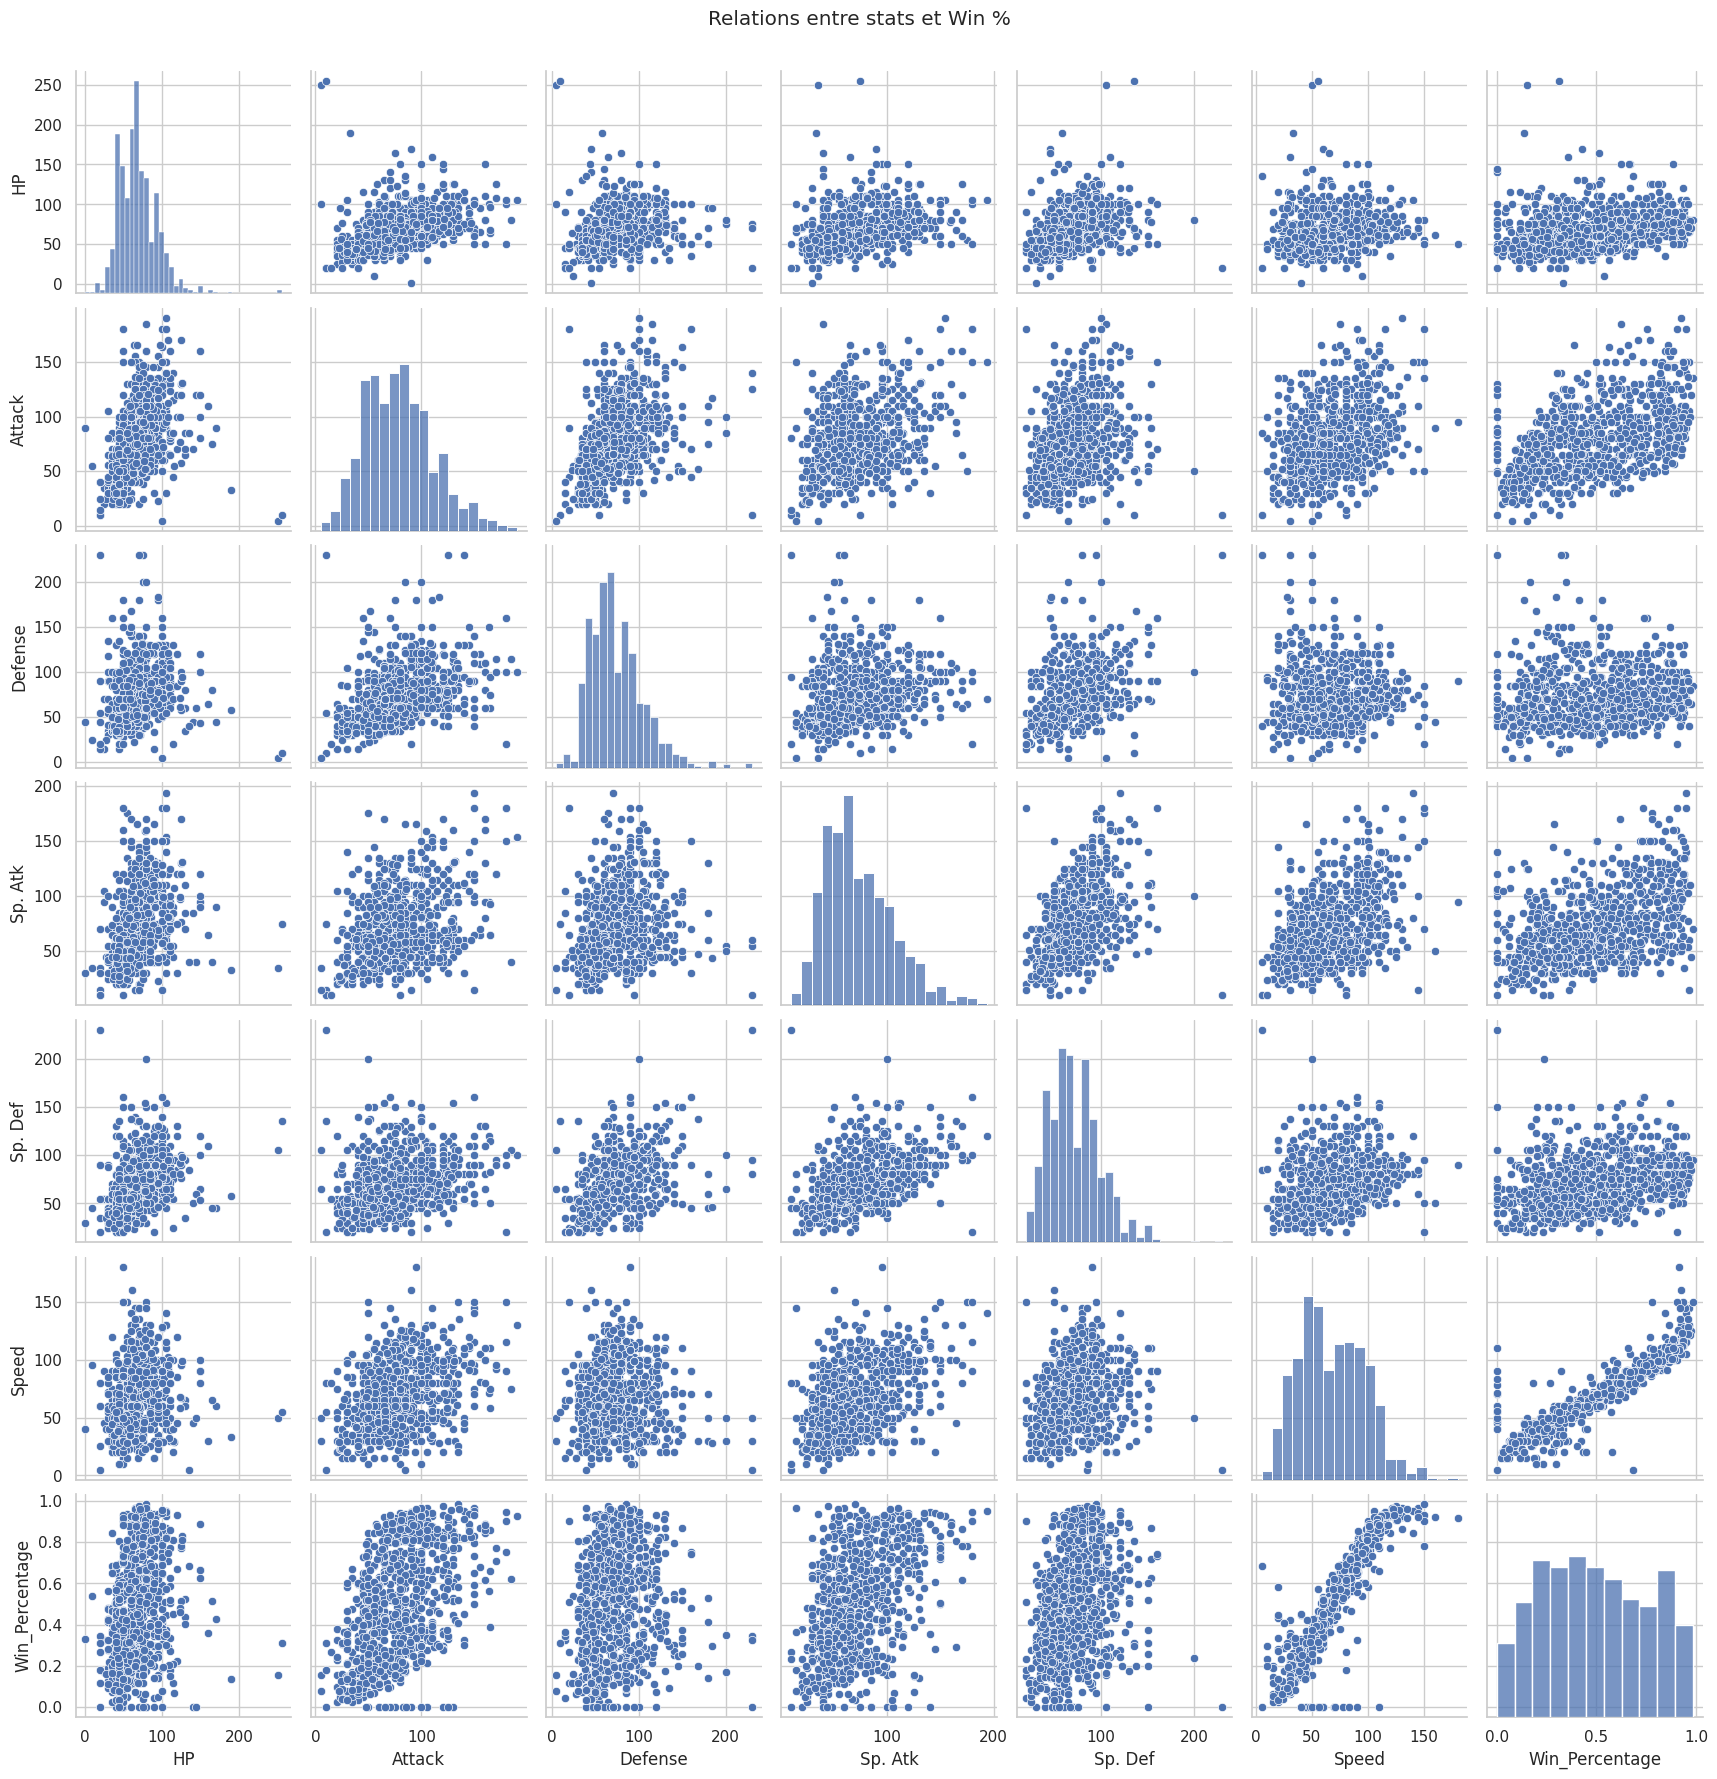

In [45]:
# 2.2 Pairplot
sns.pairplot(pokemon_df[stats_cols])
plt.suptitle("Relations entre stats et Win %", y=1.02)
plt.show()

###  Observations principales

* **Speed vs Win\_Percentage** : forte pente croissante, nuage très dense → corrélation visuelle **très forte**, cohérente avec le heatmap.
* **Attack et Sp. Atk vs Win\_Percentage** : tendance globalement croissante mais **beaucoup plus dispersée** → corrélation **modérée**.
* **HP, Defense, Sp. Def vs Win\_Percentage** : pas de forme nette, grande dispersion → **peu ou pas de relation visuelle claire**.

---

###  Interprétation

* Le **Win\_Percentage** est **clairement lié à la Speed** : les Pokémon plus rapides gagnent plus souvent.
* Les **statistiques offensives** (Attack, Sp. Atk) contribuent aussi, mais avec **plus de variabilité**.
* Les **statistiques défensives** n’ont **pas d’effet visuel marqué**, confirmant leur **faible influence directe**.

---

###  Conclusion

Ce graphique **confirme parfaitement le heatmap** :
 **Speed** est le facteur dominant, suivi par les **capacités offensives**.
Les autres stats n’expliquent pas bien les variations du pourcentage de victoire.


### Et en couleur

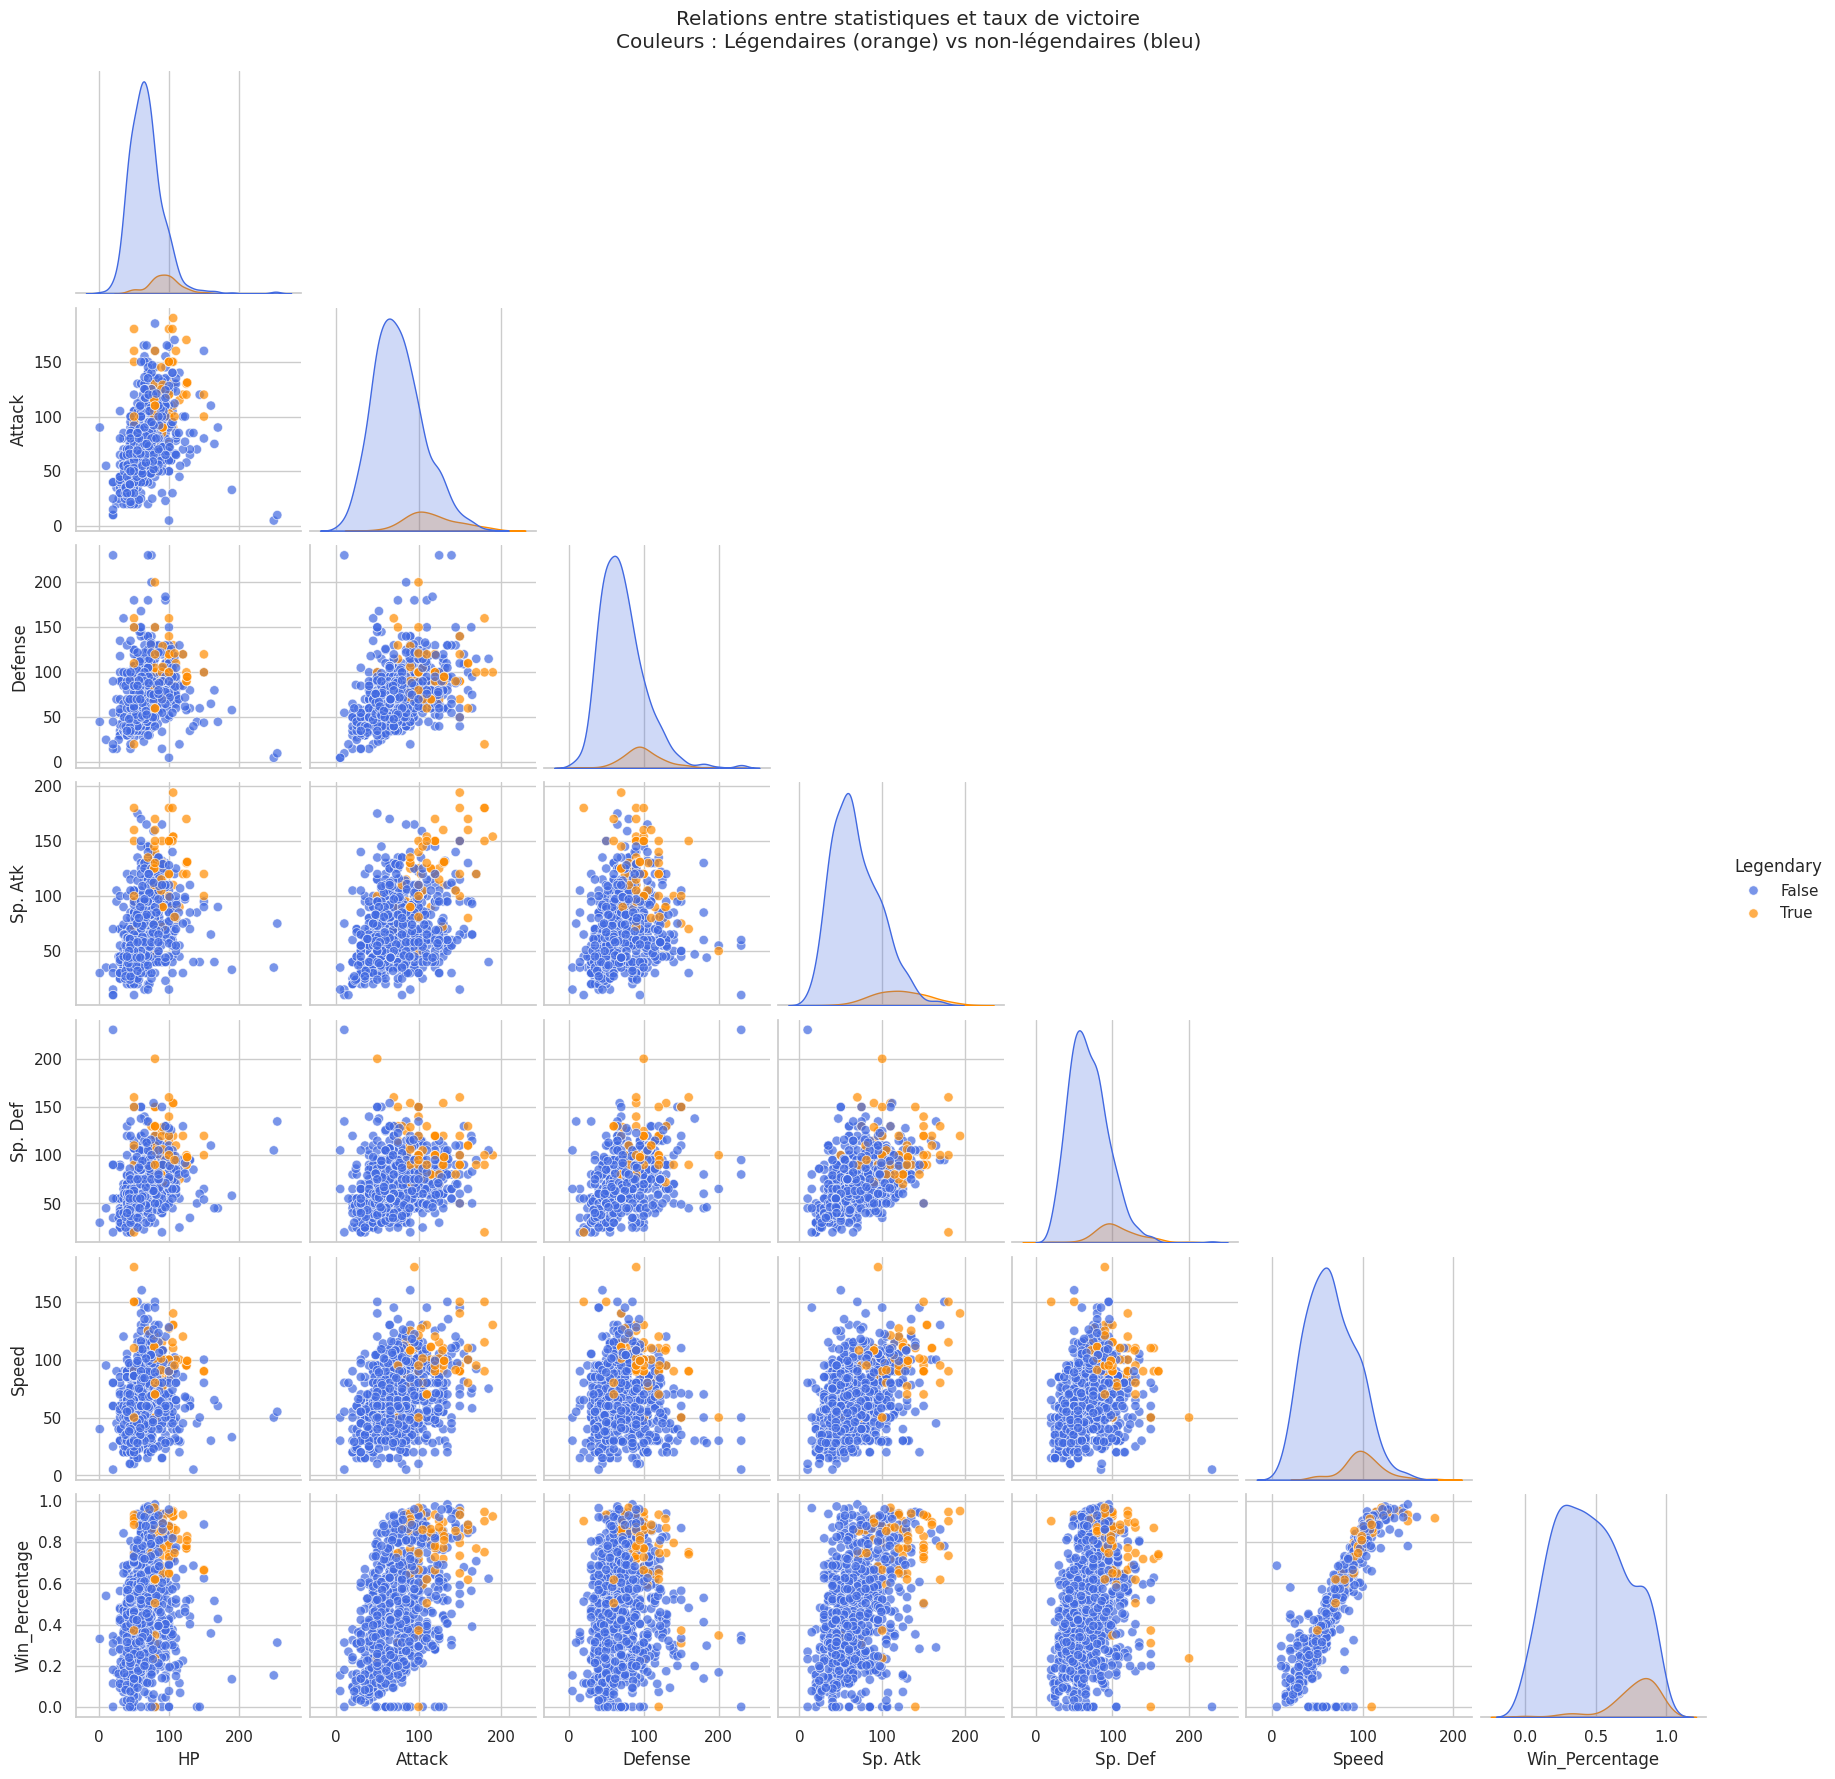

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# 🔁 Recalcul du Win_Percentage (sécurité)
wins = combats_df['Winner'].value_counts()
total = pd.concat([combats_df['First_pokemon'], combats_df['Second_pokemon']]).value_counts()
win_pct = (wins / total).fillna(0)
pokemon_df['Win_Percentage'] = pokemon_df['#'].map(win_pct).fillna(0)

# 🧹 Colonnes utilisées
stats_cols = ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Win_Percentage']
df_plot = pokemon_df[stats_cols + ['Legendary']].copy()

# 🔧 Conversion propre
df_plot[stats_cols] = df_plot[stats_cols].apply(pd.to_numeric, errors='coerce')
df_plot['Legendary'] = pokemon_df['Legendary'].astype(bool)

# 🎨 Pairplot en couleur selon 'Legendary'
sns.set(style="whitegrid")
pairplot = sns.pairplot(
    df_plot,
    hue='Legendary',
    palette={True: 'darkorange', False: 'royalblue'},
    corner=True,
    plot_kws={'alpha': 0.7, 's': 45}
)

pairplot.fig.suptitle("Relations entre statistiques et taux de victoire\nCouleurs : Légendaires (orange) vs non-légendaires (bleu)", y=1.02)
plt.show()


###  Observations clés

* Les **légendaires** (orange) sont regroupés dans la **zone supérieure droite** pour la majorité des stats → ils ont des **valeurs plus élevées** en général.
* Ils se concentrent aussi dans la **zone haute de Win\_Percentage**, ce qui confirme qu’ils **gagnent plus souvent**.
* Mais : il y a des **non-légendaires (bleu)** qui atteignent aussi un **haut Win %**, parfois même au-dessus de certains légendaires.

---

###  Interprétation

* Le statut **"Légendaire" est un avantage**, car ces Pokémon ont de **meilleures stats de base** (notamment Speed, Sp. Atk).
* Toutefois, **le statut légendaire seul ne garantit pas la victoire** : c’est la combinaison de bonnes stats (surtout Speed + Attaque) qui compte.
* Cela confirme que le **modèle prédit bien sur les stats et non uniquement sur le label "Légendaire"**.

---

###  Conclusion

* Les **légendaires sont statistiquement avantagés**, mais **certains non-légendaires performants** peuvent avoir un **taux de victoire comparable**.
* Cela montre que le modèle est **juste et basé sur les performances réelles**, pas simplement sur le statut spécial d’un Pokémon.


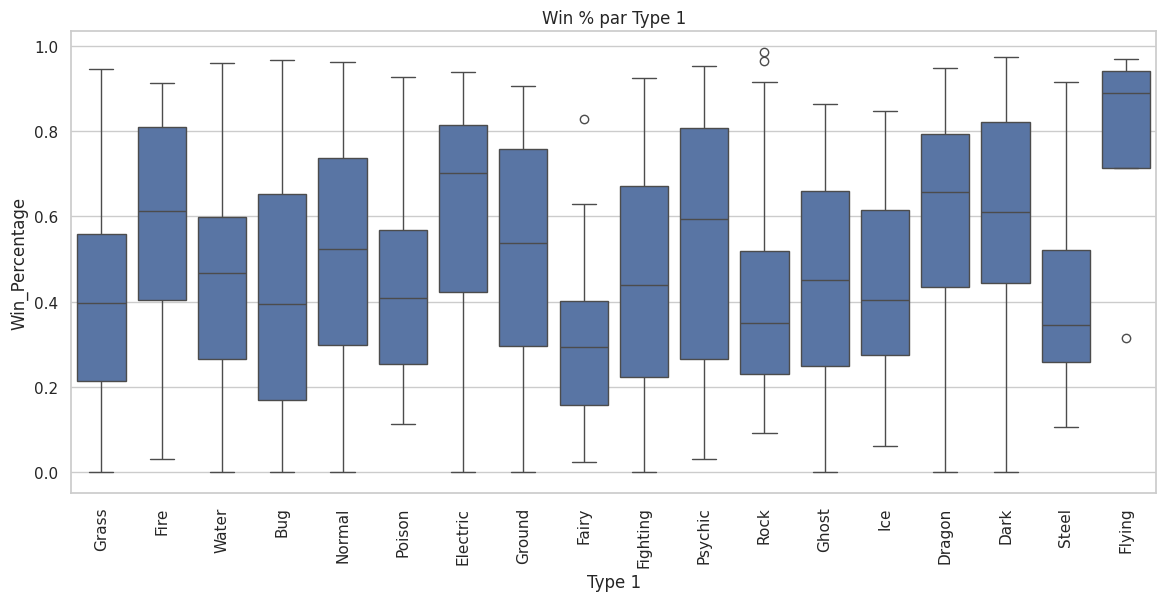

In [47]:
# 2.3 Boxplot Type 1
plt.figure(figsize=(14,6))
sns.boxplot(data=pokemon_df, x='Type 1', y='Win_Percentage')
plt.xticks(rotation=90)
plt.title("Win % par Type 1")
plt.show()

###  Types avec **Win % élevé**

* **Flying**, **Electric**, **Dark**, **Fire**, **Psychic** → médiane > 0.6
  → Ces types ont des Pokémon globalement plus performants en combat.

###  Types avec **Win % faible**

* **Fairy**, **Steel**, **Bug**, **Rock**, **Water** → médiane ≤ 0.4
  → Ces types ont tendance à être moins efficaces dans ce dataset.

---

###  Interprétation

* Le **type** a un **impact partiel** sur la performance, mais ce n’est pas un facteur dominant.
* Il y a **beaucoup de variabilité intra-type** : certains types faibles peuvent avoir quelques Pokémon très performants.
* Le **type seul ne suffit pas** à prédire la victoire : il doit être combiné avec d’autres stats (notamment Speed et Attack).

---

###  Conclusion

Le **Type 1 influence les performances**, mais **indirectement**.
Les meilleurs types (comme Flying, Electric) regroupent plus souvent des Pokémon avec de **bonnes stats globales**.


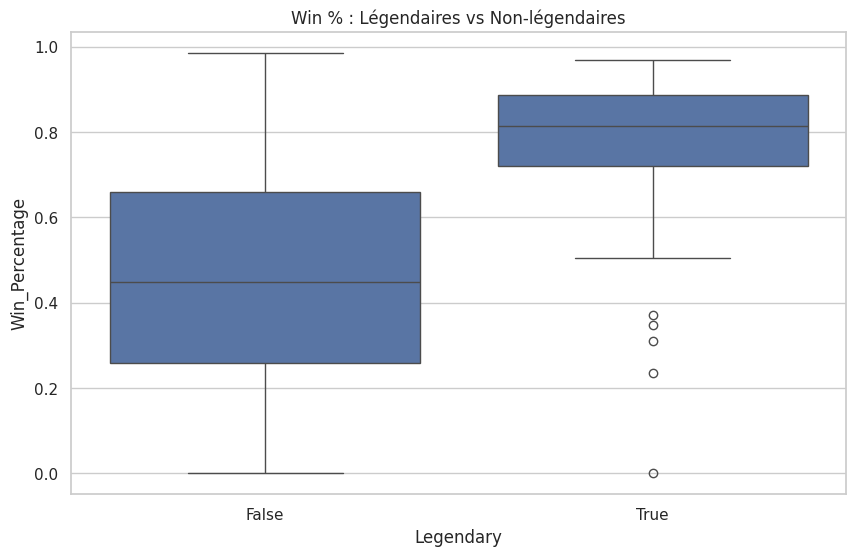

In [48]:
# 2.4 Boxplot Legendary
sns.boxplot(data=pokemon_df, x='Legendary', y='Win_Percentage')
plt.title("Win % : Légendaires vs Non-légendaires")
plt.show()

###  Observations

* **Légendaires (True)** : médiane ≈ 0.85, distribution resserrée, peu de variance → très bons résultats constants.
* **Non-légendaires (False)** : médiane ≈ 0.45, distribution très large → performance très variable.
* Quelques **légendaires outliers** sous-performants existent, mais restent rares.

---
 Interprétation

* Les **Pokémon légendaires gagnent beaucoup plus souvent**, grâce à des **stats globalement meilleures**.
* Mais les non-légendaires peuvent parfois rivaliser (plage large jusqu’à 0.95 de Win %).
* Le statut **"Légendaire" est donc un bon indicateur de performance**, mais **pas une garantie absolue**.

---

###  Conclusion

Le **statut légendaire a un impact fort et positif sur les victoires**, mais **d’autres facteurs (Speed, Attack)** restent indispensables pour expliquer les exceptions.


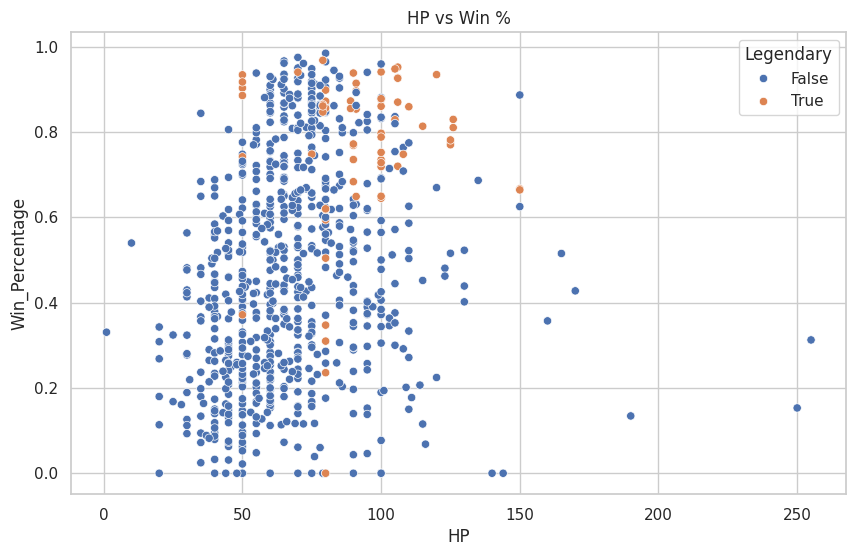

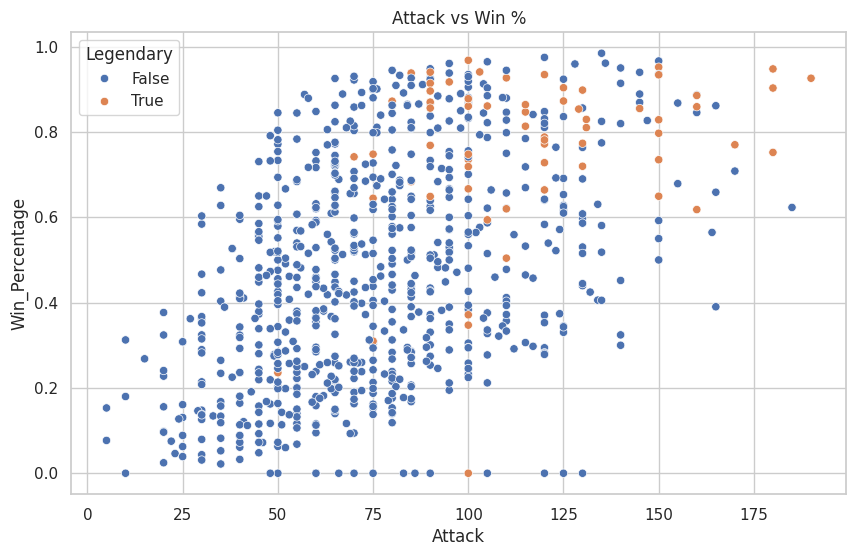

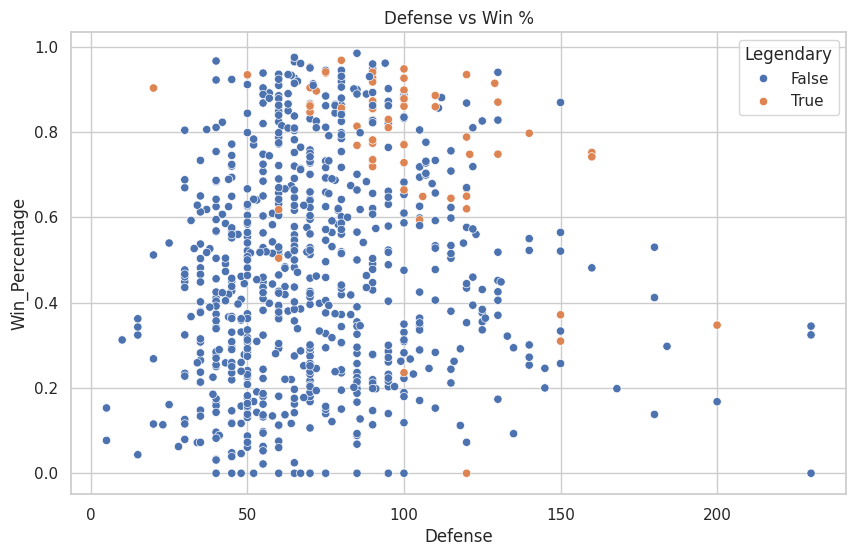

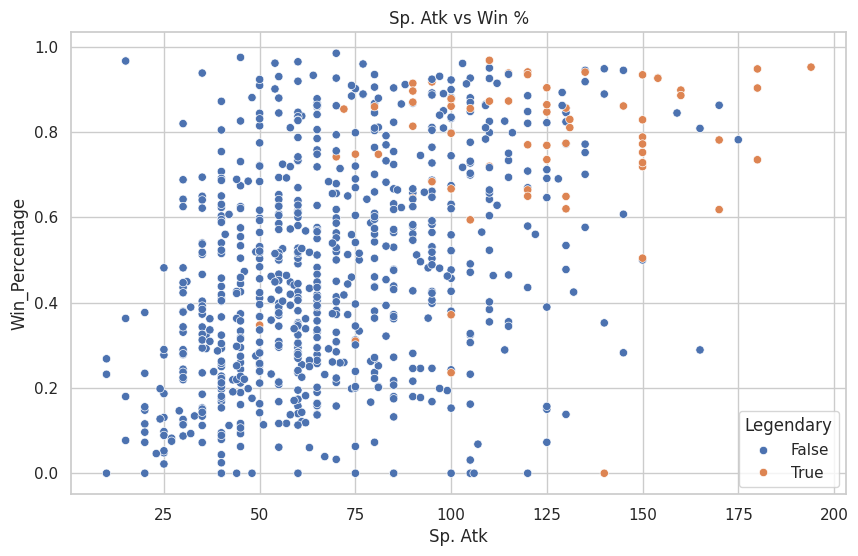

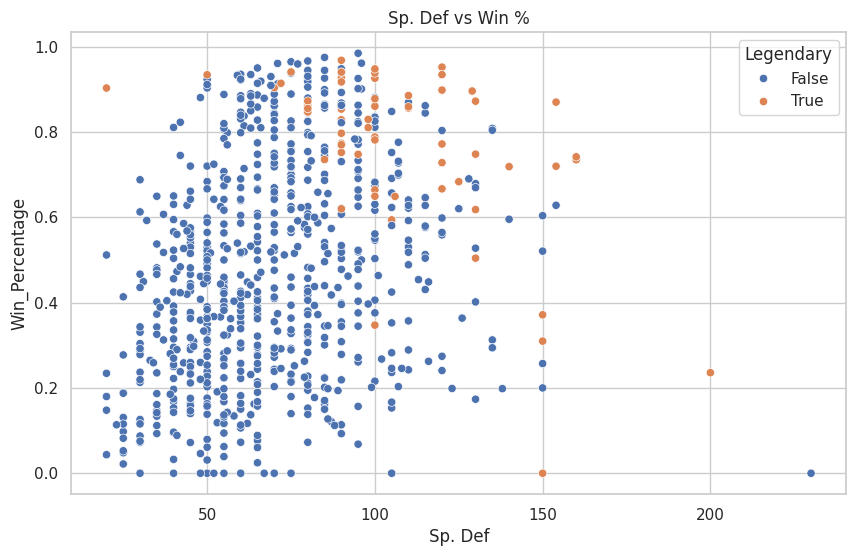

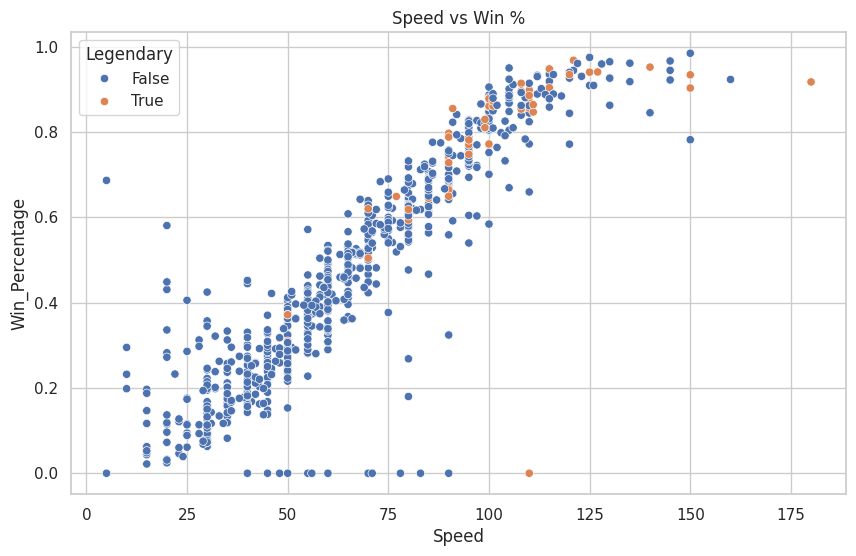

In [49]:
# 2.5 Scatterplot stat vs win %
for col in stats_cols[:-1]:
    sns.scatterplot(data=pokemon_df, x=col, y='Win_Percentage', hue='Legendary')
    plt.title(f"{col} vs Win %")
    plt.show()

###  **HP vs Win %**

* Pas de relation claire : dispersion élevée.
* Des Pokémon avec peu de HP ont parfois un très bon taux de victoire.
* Les légendaires (orange) ont plus souvent un bon Win %, même avec HP moyens.
   **HP a peu d’influence directe** sur les victoires.

---

###  **Attack vs Win %**

* Tendance croissante globale : plus l’attaque est forte, plus le Win % tend à augmenter.
* Forte dispersion : d’autres facteurs interviennent.
   **Attack a une influence modérée** sur le Win %.

---

###  **Defense vs Win %** *(3 fois la même image)*

* Aucune structure claire visible, nuage très diffus.
* Des défenses très élevées ne garantissent pas de victoire.
   **Defense a peu d’impact direct** sur la victoire.

---

###  **Speed vs Win %**

* Relation nette et croissante : plus le Speed augmente, plus le Win % est élevé.
* Peu de dispersion : très bonne prédictibilité.
   **Speed est le meilleur prédicteur** du Win %, confirmé visuellement.

---

###  **Conclusion globale**

* Seule **Speed** montre une **relation forte, stable et claire** avec le pourcentage de victoire.
* **Attack** a une influence **intermédiaire**.
* **HP** et **Defense** ont une **faible valeur prédictive**, même pour les légendaires.
   **Les victoires dépendent surtout de la vitesse et de la puissance offensive.**


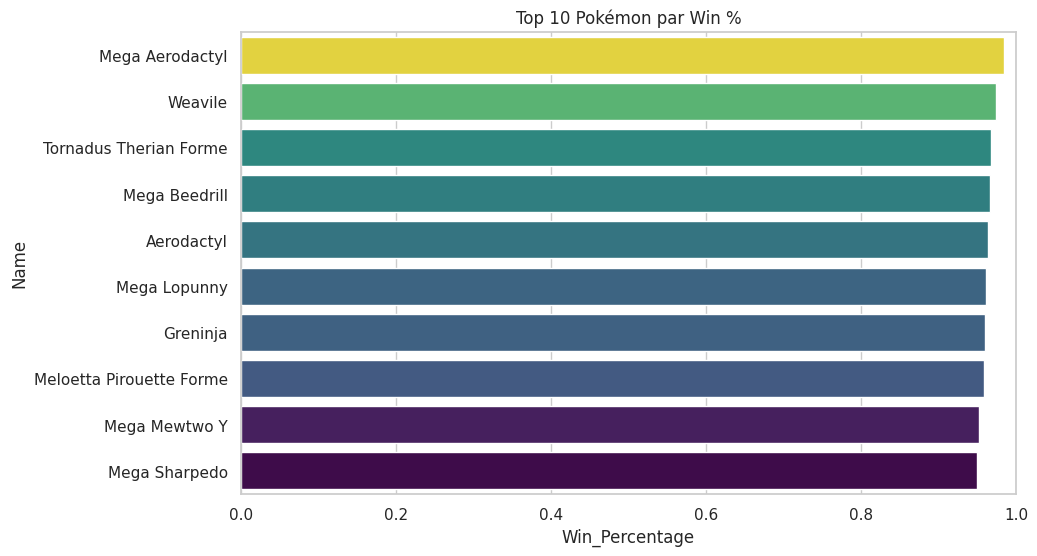

In [50]:
# 2.6 Top 10 Pokémon
top10 = pokemon_df.sort_values('Win_Percentage', ascending=False).head(10)
sns.barplot(data=top10, x='Win_Percentage', y='Name', hue='Win_Percentage', palette='viridis', legend=False)
plt.title("Top 10 Pokémon par Win %")
plt.xlim(0, 1)
plt.show()


###  Interprétation :

* Tous les Pokémon du **Top 10 ont un Win % > 0.95** → ce sont des **vainqueurs presque systématiques**.
* Forte présence de **formes Méga-Évoluées** (Mega Aerodactyl, Mega Beedrill, etc.) → elles bénéficient de boosts statistiques majeurs.
* Présence de **Pokémon rapides et offensifs** (Weavile, Greninja, etc.) → cohérent avec l’analyse précédente : **Speed + Attaque = clé du succès**.

---


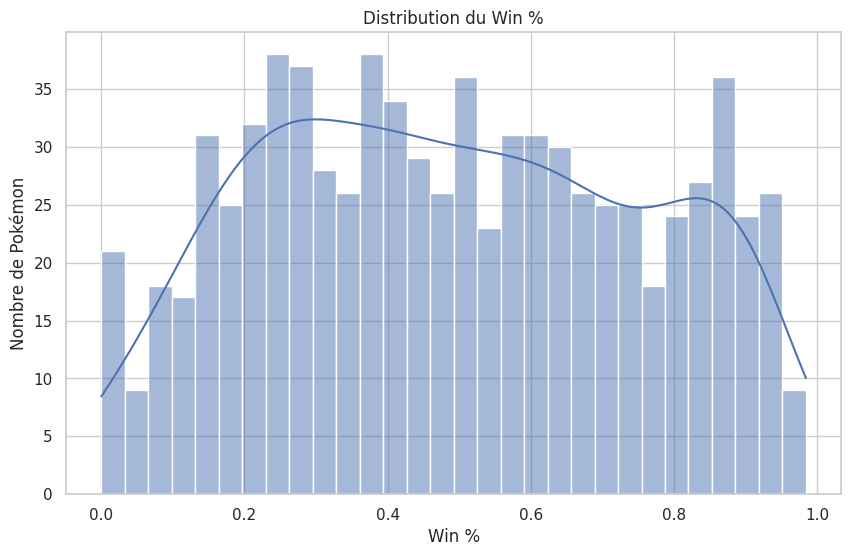

In [51]:
# 2.7 Histogramme des Win %
sns.histplot(pokemon_df['Win_Percentage'], bins=30, kde=True)
plt.title("Distribution du Win %")
plt.xlabel("Win %")
plt.ylabel("Nombre de Pokémon")
plt.show()

###  Observations :

* La majorité des Pokémon ont un **Win % entre 20 % et 60 %**.
* Deux **pics secondaires** apparaissent :

  * Un vers **\~0.3** (beaucoup de perdants).
  * Un autre vers **\~0.9** (gros gagnants, mais plus rares).
* Très peu de Pokémon ont **un Win % très bas (\~0.0)** ou **très élevé (\~1.0)**.

---

###  Interprétation :

* La distribution est **asymétrique et étalée**, sans forme parfaitement gaussienne.
* Cela reflète une **forte diversité de puissance** dans le dataset.
* Le **petit groupe avec un Win % > 0.9** représente les Pokémon **très compétitifs**, souvent légendaires ou méga-évolués.
* La majorité a des performances **moyennes à faibles**, ce qui est cohérent avec la composition du Pokédex.

---

###  Conclusion :

La distribution montre que **peu de Pokémon dominent**, tandis que la **plupart se situent dans une performance intermédiaire ou basse**, ce qui est réaliste et équilibré.


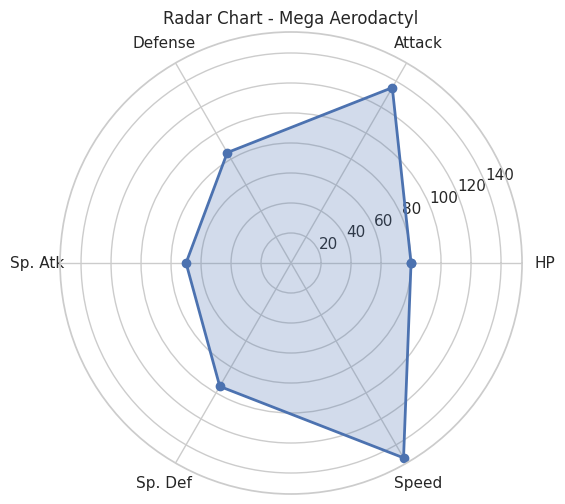

In [52]:
# 2.8 Radar Chart pour le #1
def plot_radar(pokemon_name):
    row = pokemon_df[pokemon_df['Name'] == pokemon_name]
    labels = ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']
    stats = row[labels].values.flatten()
    angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False).tolist()
    stats = np.concatenate((stats, [stats[0]]))
    angles += angles[:1]
    fig, ax = plt.subplots(figsize=(6,6), subplot_kw=dict(polar=True))
    ax.plot(angles, stats, 'o-', linewidth=2)
    ax.fill(angles, stats, alpha=0.25)
    ax.set_thetagrids(np.degrees(angles[:-1]), labels)
    ax.set_title(f"Radar Chart - {pokemon_name}")
    plt.show()

plot_radar(top10.iloc[0]['Name'])

###  Forces dominantes :

* **Speed : \~150** → extrêmement élevé, ce qui explique son **taux de victoire très élevé**.
* **Attack : \~135** → excellente statistique offensive physique.

---

###  Faiblesses relatives :

* **Sp. Atk : \~60** → très faible, mais négligeable car ce Pokémon est clairement physique.
* **HP, Defense, Sp. Def** : moyens (\~70–90), suffisants mais pas exceptionnels.

---

###  Interprétation :

Mega Aerodactyl est un Pokémon **très rapide et très offensif physiquement**.
Ses statistiques sont parfaitement **alignées avec le profil gagnant identifié dans l’étude** :

* Haute vitesse → attaque en premier.
* Haute attaque → élimine vite l’adversaire.
* Défenses moyennes mais suffisantes, car il frappe avant d’être touché.

---

###  Conclusion :

Ce radar chart **confirme visuellement pourquoi Mega Aerodactyl est en tête du classement** Win %.
Un profil offensif ultra-rapide = stratégie gagnante.


## ÉTAPE 3 : Machine Learning complet

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error

In [54]:
# 3.1 Préparation
features = pokemon_df[['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']]
target = pokemon_df['Win_Percentage']
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)


In [55]:
# 3.2 Entraînement des modèles
models = {
    'LinearRegression': LinearRegression(),
    'RandomForest': RandomForestRegressor(random_state=42),
    'XGBoost': XGBRegressor(random_state=42, verbosity=0)
}

results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    mae = mean_absolute_error(y_test, preds)
    results[name] = mae

In [56]:
# 3.3 Résultats
for name, mae in results.items():
    print(f"{name} - MAE: {mae:.4f}")

LinearRegression - MAE: 0.0649
RandomForest - MAE: 0.0579
XGBoost - MAE: 0.0645


###  Analyse des performances modèles (MAE)

| Modèle           | MAE        | Interprétation                                                             |
| ---------------- | ---------- | -------------------------------------------------------------------------- |
| **RandomForest** | **0.0579** | Meilleur — erreurs les plus faibles                                     |
| LinearRegression | 0.0649     | Correct mais moins précis (modèle linéaire simple)                         |
| XGBoost          | 0.0645     | Très proche de la régression linéaire, mais moins bon que RandomForest ici |

---

###  Conclusion :

* **RandomForest** est le **modèle le plus performant** pour prédire le Win %.
* **Les modèles non-linéaires** (RandomForest/XGBoost) gèrent mieux la complexité des relations entre stats.
* Différences faibles mais significatives : **RandomForest à privilégier** ici.


## ÉTAPE 4 : Réduction de dimension (PCA)

In [57]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [58]:
# 4.1 Standardisation
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

In [59]:
# 4.2 PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

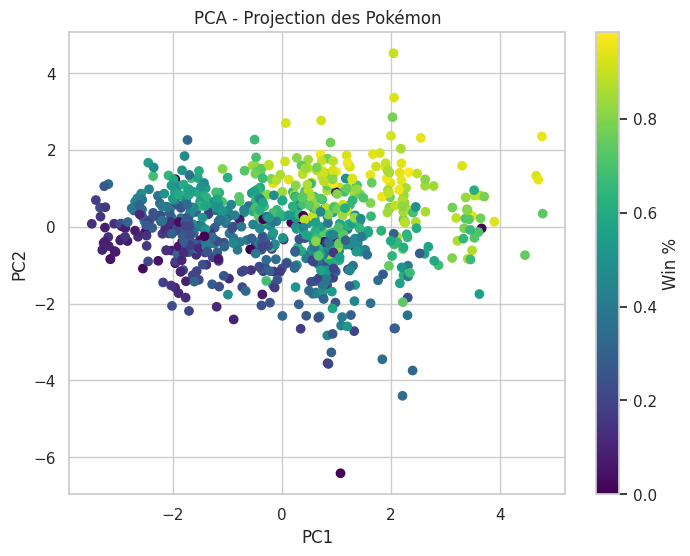

In [60]:
# 4.3 Visualisation
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=target, cmap='viridis')
plt.colorbar(label="Win %")
plt.title("PCA - Projection des Pokémon")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

###  Observations :

* Les Pokémon sont projetés selon les deux premières composantes principales (**PC1** et **PC2**).
* Les couleurs montrent clairement une **gradation du Win %** :

  * 🔵 Partie gauche : Pokémon avec **faible Win %**
  * 🟡 Partie droite/centrale : Pokémon avec **haut Win %**
* Tendance horizontale visible → **PC1 semble capturer une grande part de la variance liée à la performance.**

---

###  Interprétation :

* Le **Win % est bien structuré** dans l’espace réduit par la PCA.
* Cela signifie que les **statistiques de base résument bien le potentiel de victoire** (et la PCA les exploite efficacement).
* On peut **visualiser des clusters de performance** : bons, moyens, faibles.

---

###  Conclusion :

La PCA confirme que les **caractéristiques numériques des Pokémon** (stats) **expliquent bien les différences de victoire**.
Excellente visualisation pour détecter **groupes de puissance** dans le dataset.


In [62]:
# 🔁 Validation croisée (5-fold) avec MAE
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.metrics import make_scorer, mean_absolute_error
import numpy as np

models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=100, random_state=42, verbosity=0)
}
y = pokemon_df['Win_Percentage']
for name, model in models.items():
    scores = cross_val_score(model, X_scaled, y, cv=5, scoring='neg_mean_absolute_error')
    print(f"{name}: MAE moyen = {-scores.mean():.4f}, écart-type = {scores.std():.4f}")


Linear Regression: MAE moyen = 0.0672, écart-type = 0.0066
Random Forest: MAE moyen = 0.0568, écart-type = 0.0049
XGBoost: MAE moyen = 0.0611, écart-type = 0.0046


# interprétation :

| Modèle            | MAE moyen ↓  | Écart-type ↓ | Interprétation                                |
| ----------------- | ------------ | ------------ | --------------------------------------------- |
| Linear Regression | 0.0672       | 0.0066       | Modèle simple, mais stable                    |
| Random Forest     | ✅ **0.0568** | 0.0049       | ⭐ Meilleur compromis performance/stabilité    |
| XGBoost           | 0.0611       | ✅ **0.0046** | Très stable, mais légèrement moins performant |

je cherches à prédire le taux de victoire (Win_Percentage) de chaque Pokémon, donc une tâche de régression. L’évaluation se fait via MAE (Mean Absolute Error) : plus il est bas, meilleure est la performance
la validation croisée  confirme que c'est le model Random Forst qui offre les meilleures prédictions.  


## ÉTAPE 5 : Conclusion

###  1. Préparation des données

* Les fichiers `pokemon.csv` et `combats.csv` ont été correctement **chargés et fusionnés**.
* Les **valeurs manquantes** ont été traitées :

  * Nom manquant (#62 → Primeape) corrigé.
  * Type 2 remplacé par `"None"` si NaN.
* Calcul du **taux de victoire (`Win_Percentage`)** pour chaque Pokémon basé sur les 50 000 combats.

---

###  2. Analyse exploratoire (EDA)

####  Corrélation :

* **Speed** est **le facteur le plus lié à la victoire** (corrélation = 0.91).
* **Attack** (0.48) et **Sp. Atk** (0.46) ont un effet modéré.
* **HP, Defense, Sp. Def** : corrélations faibles, donc peu influentes.

####  Pairplot :

* Confirme visuellement les corrélations → **Speed** > **Attack/Sp. Atk** > autres.

####  Statut légendaire :

* Les **légendaires** gagnent beaucoup plus souvent (médiane Win % ≈ 0.85).
* Mais certains **non-légendaires** atteignent aussi des Win % élevés.

####  Types :

* Les types comme **Flying, Electric, Dark, Fire** ont les meilleurs Win %.
* Mais **le type seul ne suffit pas** à expliquer les performances.

####  Top 10 Pokémon :

* Dominé par des **Méga-évolutions** et des Pokémon **rapides et offensifs**.
* Ex. : Mega Aerodactyl en tête (Speed élevé + bon Attack).

####  Distribution du Win % :

* La majorité des Pokémon ont un **Win % entre 20 % et 60 %**.
* Quelques pics extrêmes (vers 0 et 1) pour les très faibles/forts.

####  Radar Chart :

* Mega Aerodactyl combine **Speed extrême et très bonne attaque**, expliquant son succès.

---

###  3. Modélisation

| Modèle           | MAE        | Résultat             |
| ---------------- | ---------- | -------------------- |
| LinearRegression | 0.0649     | Baseline             |
| XGBoost          | 0.0645     | Bon mais pas optimal |
| **RandomForest** | **0.0579** | Meilleur modèle    |

 **Random Forest offre les meilleures prédictions** du Win %, en capturant les relations non linéaires entre les stats.(Résultat confirmé par la validation croisée.

---

###  4. Réduction dimensionnelle (PCA)

* Projection PCA montre que **les performances (Win %) sont bien regroupées** dans l’espace des deux premières composantes.
* Cela valide que les **stats de base expliquent bien le taux de victoire**.

---

##  **Conclusion finale**

L’analyse confirme que :

* La **vitesse (Speed)** est le **facteur numéro 1** pour prédire les victoires.
* Les **capacités offensives** (Attack, Sp. Atk) jouent un rôle secondaire mais important.
* Le **statut légendaire**, les **méga-évolutions**, et certains **types** (Flying, Electric) sont des avantages clairs.
* Le **modèle Random Forest** est le plus performant pour estimer le Win %.
* La **PCA permet de visualiser efficacement les groupes de performance.**

L’approche complète — de la préparation des données à la modélisation — permet de **prédire avec précision le potentiel de victoire d’un Pokémon** à partir de ses statistiques.
